## Check dependencies to run this code:

    geopandas
    pandas
    networkx
    igraph
    osmnx
    numpy
    shapely
    
The functions demonstrated are located in `allocation.py`

In [11]:
from allocation import *
import geopandas as gpd

First we get the data from the traffic zones of São Carlos and the network's graph from OpenStreetMap

In [12]:
tzs = gpd.read_file('data\\ZTs') #fetch traffic zones from shapefile

#Fetch graph from shapefile above
#The graph is marked on the centroids with zone id
#needs internet connection
G = graph_from_traffic_zones(tzs, network_type='drive', 
                             get_centroids=True,
                            zone_id_column='ID_REAL')                       

This function is different from the original in OSMnx since it generates a graph specifically for allocation purposes with traffic zones marked on the nodes of the network closest to the centroid

<AxesSubplot:>

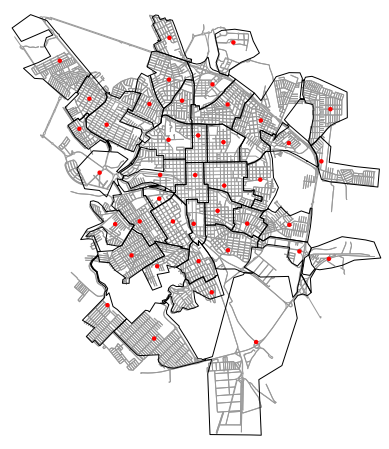

In [20]:
plot_network(G,tzs)

Now we fetch OD data. The format must be a csv table with ";" separators.
This OD is a syntetic version of the original to show higher traffic volumes

In [23]:
od = fetch_OD_data('data\\syntetic_individual_motorized_Sao_Carlos.csv')
od

,tz_1,tz_2,tz_3,tz_4,tz_5,tz_6,tz_7,tz_8,tz_9,tz_10,...,tz_32,tz_33,tz_34,tz_35,tz_36,tz_37,tz_38,tz_39,tz_40,tz_41
tz_1,728,150,0,50,0,226,0,201,201,50,...,25,25,251,50,75,0,0,0,0,0
tz_2,125,150,0,0,0,0,0,50,150,25,...,50,0,100,25,0,0,0,0,0,0
tz_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tz_4,75,25,0,150,0,50,150,251,100,75,...,25,0,25,25,0,75,0,0,25,0
tz_5,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,0
tz_6,276,0,0,25,0,0,25,100,100,25,...,100,25,50,25,0,75,0,25,0,0
tz_7,50,0,0,125,0,25,150,326,175,0,...,75,25,25,50,0,100,0,25,50,0
tz_8,201,50,0,301,0,100,376,753,477,0,...,75,0,0,0,0,0,0,0,0,0
tz_9,201,150,0,150,0,75,201,452,804,75,...,50,75,100,50,0,0,0,25,25,0
tz_10,75,25,0,75,25,25,0,0,75,301,...,50,75,25,50,0,0,0,25,25,0


Graph is prepared with capacity, speed, alpha and beta for each edge.
On a real project, there is variation on the capacity and speed of each type of road, but here we fix te values for all edges as a demostration

In [26]:
#for this demonstration, we will consider the same capacity and speed for all edges 
G = prep_graph(G,capacity_per_lane=1000, #veh/h
    base_speed=40,
    alpha_BPR=0.15,
    beta_BPR=4)

In [27]:
#Now the allocation all-or-nothing
flows_AON = all_or_nothing(G, od_mat=od)

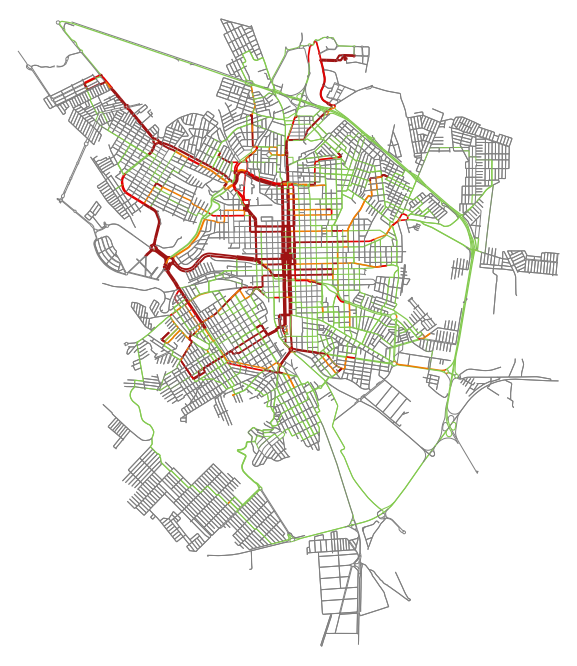

In [28]:
plot_flow(G, flows_AON, bgcolor='w',max_width=7)

In [29]:
# now the user equilibrium
flows_UE = user_equilibrium(G, od, verbose=True,tolerance=0.001, max_iter=100,)

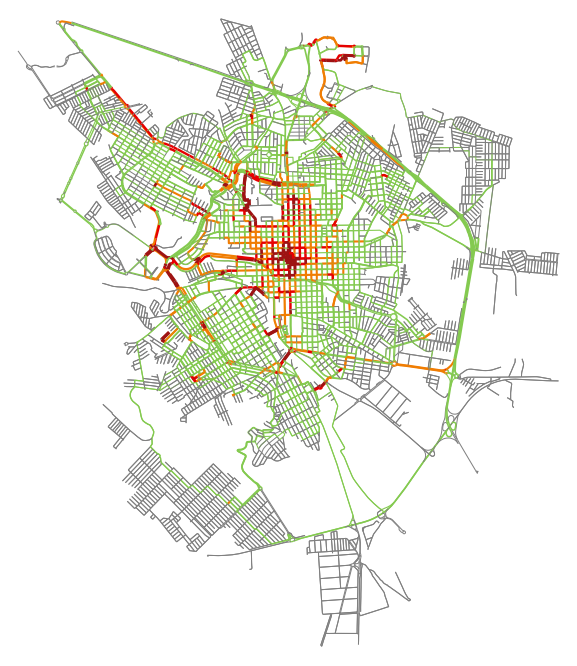

In [30]:
plot_flow(G, flows_UE, bgcolor='w',max_width=7)